In [1]:
import torch
import matplotlib.pyplot as plt

from PIL import Image
import os

## Creating a  dataset

We know we need to access the data being provided, pytorch provides us with a nifty class called Dataset to make it happen.

In [2]:
## testing
loc = "../input/dogs-cats-images/dataset"
loc = loc + "/training_set"
loc = loc + "/cats"
cat_names = os.listdir(loc)
cat_names[:5]

['cat.3498.jpg', 'cat.891.jpg', 'cat.2842.jpg', 'cat.1.jpg', 'cat.115.jpg']

for creating a pytorch dataset,

you need to define 3 things inside a class that extends over `torch.utils.data.Dataset`

1. `__init__` : for intialising the dataset, getting all the images and labels. For init in this case we are taking in the loc of cats and dogs and using "os.listdir" to enumerate all image files of the directory. Then it would be placed in `self.data` and `self.labels` for access by other methods of the class.

2. `__len__` : this returns the length of the dataset. 

3. `__getitem__`: this takes in an index and returns an image and label. We open an image file using `PIL.Image` and return the appropriate PIl image and label based on index.

In [3]:
import torchvision.transforms as transforms

my_transform = transforms.Compose(
        [transforms.RandomResizedCrop(64),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])

my_transform is primarily here to convert the image into a tensor and data augmentation.

In [4]:
class dataset_maker(torch.utils.data.Dataset):
    def __init__(self, loc="../input/dogs-cats-images/dataset", train=True, transform=my_transform):
        if train == True:
            loc = loc + "/training_set"
        else:
            loc = loc + "/test_set"
        
        self.transform = transform
        
        self.labels = []
        self.data = []
        self.cats = os.listdir(loc + "/cats")
        
        for i in range(len(self.cats)):
            self.data.append(loc + "/cats/" + self.cats[i])
            self.labels.append(0)
            
        self.dogs = os.listdir(loc + "/dogs")
        
        for i in range(len(self.dogs)):
            self.data.append(loc + "/dogs/" + self.dogs[i])
            self.labels.append(1)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        im = Image.open(self.data[index])
        
        if (self.transform):
            im = self.transform(im)
            
        return im, self.labels[index]
        
        

In [5]:
train_dataset = dataset_maker()
test_dataset = dataset_maker(train=False)

In [6]:
len(train_dataset)

8000

Lets look at the sample image of our training dataset after normalisation.

0


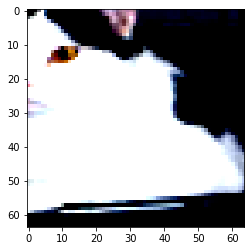

In [7]:
X, y = test_dataset[0]

print(y)
plt.imshow(X.permute(1,2,0))

## Creating a dataloader

Now that we have our class loaded lets try and make a dataloader. To do so you need to simply load in your dataset, say if you want to `shuffle` your dataset and give it a `batch_size`.

In [8]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=128)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=128)

## Creating the neural net



Lets check the input shape

In [9]:
X.shape

torch.Size([3, 64, 64])

In [10]:
from torch import nn

In [11]:
nn.Flatten(X)

Flatten(
  start_dim=tensor([[[-1.6042, -1.3473, -0.6281,  ..., -0.2513, -0.5082, -1.3987],
           [-0.9534, -0.3541,  0.4508,  ..., -0.2171, -0.4397, -1.3644],
           [ 0.3481,  0.8104,  1.2385,  ..., -0.1999, -0.4226, -1.3130],
           ...,
           [-1.4672, -1.5014, -1.4500,  ..., -1.6898, -1.6727, -1.6898],
           [-1.5870, -1.6213, -1.6213,  ..., -1.3473, -1.4500, -1.6555],
           [-1.2617, -1.4843, -1.6042,  ..., -1.5014, -1.3302, -1.3302]],
  
          [[-1.6155, -1.3880, -0.6702,  ..., -0.1275, -0.3901, -1.3704],
           [-0.9853, -0.3901,  0.4853,  ..., -0.0924, -0.3375, -1.3179],
           [ 0.3803,  0.8529,  1.3431,  ..., -0.0749, -0.3200, -1.2654],
           ...,
           [-1.3880, -1.4230, -1.4230,  ..., -1.6155, -1.5980, -1.6155],
           [-1.5105, -1.5455, -1.5805,  ..., -1.2654, -1.3704, -1.5805],
           [-1.1779, -1.4055, -1.5805,  ..., -1.4230, -1.2479, -1.2479]],
  
          [[-1.3861, -1.1770, -0.6367,  ...,  0.1128, -0.2010, -1

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [13]:
import torchvision
net = torchvision.models.resnet18()

In [14]:
lr = 0.01

optimizer = torch.optim.SGD(net.parameters(),lr=lr)
loss = nn.CrossEntropyLoss()

In [15]:
net = net.to(device=device)
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
with torch.no_grad():
    for X, y in train_dataloader:
        X = X.to(device=device)
        print(X.shape)
        print(net(X))
        print(loss(net(X), y.to(device=device)))
        break

torch.Size([128, 3, 64, 64])
tensor([[-0.6085, -0.8410, -0.2325,  ..., -0.3405,  0.2936, -0.3237],
        [-0.6188, -0.4725,  0.1352,  ..., -0.0462,  0.1890, -0.5251],
        [-0.9439, -0.9879, -0.1978,  ..., -0.1635, -1.1005, -0.4787],
        ...,
        [-0.2210, -0.6015,  0.1086,  ..., -0.5151,  0.3443,  0.0592],
        [-0.5746, -0.4998, -0.1642,  ..., -0.3679, -0.2533, -0.1703],
        [-0.4446, -0.9543,  0.0522,  ..., -0.2500,  0.0558, -0.3558]],
       device='cuda:0')
tensor(7.7050, device='cuda:0')


In [17]:
def evaluate_loss(net, train_iter, loss):
    net.eval()
    with torch.no_grad():
        current_loss =0
        current_number = 0
        
        for X , y in train_iter:
            y = y.to(device=device)
            current_loss += loss(net(X.to(device=device)), y)
            current_number += len(y)
            if current_number > 100:
                break
    
    return current_loss/ current_number

In [18]:
num_epochs = 2

from tqdm import tqdm

for epoch in range(num_epochs):
    for X, y in tqdm(train_dataloader):
        y = y.to(device=device)
        l = loss(net(X.to(device=device)), y)
        
        optimizer.zero_grad()
        
        l.backward()
        
        optimizer.step()
    print(f"For epoch {epoch} the loss: {evaluate_loss(net, train_dataloader, loss)}")
    

  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 0 the loss: 0.0056854793801903725


100%|██████████| 63/63 [00:31<00:00,  1.99it/s]


For epoch 1 the loss: 0.00534426886588335


In [19]:
print(evaluate_loss(net, test_dataloader, loss))

tensor(0.0054, device='cuda:0')


In [20]:
!wget -O cat.png "https://images.unsplash.com/photo-1529778873920-4da4926a72c2?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8Y3V0ZSUyMGNhdHxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&w=1000&q=80" -o cat.png

In [26]:
test_img = Image.open("../input/dogs-cats-images/dataset/test_set/cats/cat.4001.jpg")

test_img = my_transform(test_img).unsqueeze(0)

net(X.to(device=device)).argmax()

tensor(1, device='cuda:0')

In [27]:
# currently its classifying it as a dog lets see if more trianing gets us better resulst

num_epochs = 20

from tqdm import tqdm

for epoch in range(num_epochs):
    for X, y in tqdm(train_dataloader):
        y = y.to(device=device)
        l = loss(net(X.to(device=device)), y)
        
        optimizer.zero_grad()
        
        l.backward()
        
        optimizer.step()
    print(f"For epoch {epoch} the loss: {evaluate_loss(net, train_dataloader, loss)}")
    

  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 0 the loss: 0.005226390901952982


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 1 the loss: 0.0053666140884160995


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 2 the loss: 0.0053709628991782665


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 3 the loss: 0.005666648969054222


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 4 the loss: 0.006526636425405741


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 5 the loss: 0.005267301574349403


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 6 the loss: 0.005032021552324295


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 7 the loss: 0.00476869847625494


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 8 the loss: 0.005166557151824236


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 9 the loss: 0.0050935144536197186


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 10 the loss: 0.004957583732903004


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 11 the loss: 0.005431669764220715


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 12 the loss: 0.005048451013863087


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 13 the loss: 0.005753794219344854


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 14 the loss: 0.00592288700863719


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 15 the loss: 0.004627717658877373


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 16 the loss: 0.0046249935403466225


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 17 the loss: 0.005457020364701748


  0%|          | 0/63 [00:00<?, ?it/s]

For epoch 18 the loss: 0.005073504522442818


100%|██████████| 63/63 [00:31<00:00,  2.02it/s]


For epoch 19 the loss: 0.0048598661087453365


In [31]:
test_img = Image.open("../input/dogs-cats-images/dataset/test_set/cats/cat.4001.jpg")

test_img = my_transform(test_img).unsqueeze(0)

net(X.to(device=device)).argmax()

tensor(16001, device='cuda:0')